In [1]:
pwd

'C:\\Users\\ARUN'

In [2]:
cd Desktop/ml/train

C:\Users\ARUN\Desktop\ml\train


In [3]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [4]:
import pandas as pd
train=pd.read_csv('train.csv',dtype=dtypes,nrows=100000)

In [5]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import time
train_sample_fraction = None
na_rate_threshold = 0.9
train_sample_num = 15000
unbalanced_feature_rate_threshold = 0.9

In [6]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_and_binary_columns = [c for c,v in dtypes.items() if v in numerics]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 83 columns):
MachineIdentifier                                    100000 non-null category
ProductName                                          100000 non-null category
EngineVersion                                        100000 non-null category
AppVersion                                           100000 non-null category
AvSigVersion                                         100000 non-null category
IsBeta                                               100000 non-null int8
RtpStateBitfield                                     99639 non-null float16
IsSxsPassiveMode                                     100000 non-null int8
DefaultBrowsersIdentifier                            4890 non-null float16
AVProductStatesIdentifier                            99607 non-null float32
AVProductsInstalled                                  99607 non-null float16
AVProductsEnabled                                

In [8]:
train.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,100000.0,99639.0,100000.000000,4890.0,99607.000000,99607.0,99607.0,100000.000000,100000.000000,96385.000000,...,98167.000000,100000.000000,36341.0,99815.000000,100000.000000,100000.00000,99157.000000,96585.000000,96585.0,100000.000000
mean,0.0,NaN,0.017630,inf,47888.457031,NaN,NaN,0.987270,108.188050,81075.484375,...,33054.906250,0.484990,0.0,0.006641,0.125420,0.03715,0.057495,0.281738,NaN,0.499280
std,0.0,0.0,0.131603,inf,14019.956055,0.0,0.0,0.112107,62.989406,48940.414062,...,21224.316406,0.499777,0.0,0.081238,0.331196,0.18913,0.232788,0.449951,0.0,0.500002
min,0.0,0.0,0.000000,1.0,39.000000,1.0,0.0,0.000000,1.000000,7.000000,...,5.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.000000
25%,0.0,7.0,0.000000,788.0,49480.000000,1.0,1.0,1.000000,51.000000,36303.000000,...,13154.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,3.0,0.000000
50%,0.0,7.0,0.000000,1632.0,53447.000000,1.0,1.0,1.000000,97.000000,82373.000000,...,33070.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,10.0,0.000000
75%,0.0,7.0,0.000000,2290.0,53447.000000,2.0,1.0,1.000000,162.000000,123627.000000,...,52458.000000,1.000000,0.0,0.000000,0.000000,0.00000,0.000000,1.000000,11.0,1.000000
max,0.0,8.0,1.000000,3196.0,70486.000000,5.0,4.0,1.000000,222.000000,167953.000000,...,72091.000000,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,15.0,1.000000


In [9]:
stats = []
for col in train.columns:
    stats.append((col, train[col].dtype, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100))
    
stats_df = pd.DataFrame(stats, columns=['Feature', "type", 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category'])

stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,type,Unique_values,Percentage of missing values,Percentage of values in the biggest category
28,PuaMode,category,1,99.969,99.969
41,Census_ProcessorClass,category,3,99.573,99.573
8,DefaultBrowsersIdentifier,float16,278,95.110,95.110
68,Census_IsFlightingInternal,float16,1,83.163,83.163
52,Census_InternalBatteryType,category,22,71.240,71.240
...,...,...,...,...,...
1,ProductName,category,2,0.000,98.880
45,Census_HasOpticalDiskDrive,int8,2,0.000,92.415
51,Census_PowerPlatformRoleName,category,9,0.000,69.269
54,Census_OSVersion,category,260,0.000,15.709


In [10]:
good_cols = list(train.columns)

for col in train.columns:
    
    # remove columns with high NA rate
    na_rate = train[col].isnull().sum() / train.shape[0]
    
    # remove columns with high Unbalanced values rate
    unbalanced_rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    
    if na_rate > na_rate_threshold:
        good_cols.remove(col)
    elif unbalanced_rate > unbalanced_feature_rate_threshold:
        good_cols.remove(col)

In [11]:
good_cols

['MachineIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSVersion

In [12]:
print("train data set reduced size in memory:", train.memory_usage().sum() / (1000000000))

train data set reduced size in memory: 0.018757128


In [13]:
train = train[good_cols]

In [14]:
del stats_df

In [15]:

import gc

gc.collect()

131

In [16]:
train.head()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,...,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,...,NaN,NaN,628.0,36144.0,0,NaN,0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,...,NaN,NaN,628.0,57858.0,0,NaN,0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,...,NaN,NaN,142.0,52682.0,0,NaN,0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,...,NaN,NaN,355.0,20050.0,0,NaN,0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,1.0,18,37376.0,NaN,277.0,...,0.0,0.0,355.0,19844.0,0,0.0,0,0.0,1.0,1


In [17]:
train.shape

(100000, 57)

In [18]:
train['HasDetections'].value_counts()

0    50072
1    49928
Name: HasDetections, dtype: int64

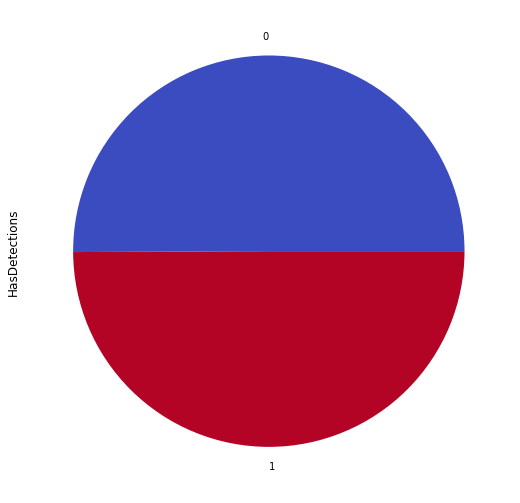

In [19]:
train['HasDetections'].value_counts().plot(kind="pie", figsize=(12,9), colormap="coolwarm")

In [20]:
categorical_columns = list(train.loc[:, train.dtypes =="category"].columns)
numerical_and_binary_columns = list(train.loc[:, train.dtypes !="category"].columns)
numerical_columns = numerical_and_binary_columns

categorical_columns.remove("MachineIdentifier")

binary_columns = []
for col in (numerical_and_binary_columns):
    if train[col].nunique() == 2:
        binary_columns.append(col)
        numerical_columns.remove(col)

In [21]:
categorical_columns

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel']

In [22]:
len(numerical_columns)

32

In [23]:
binary_columns

['Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'HasDetections']

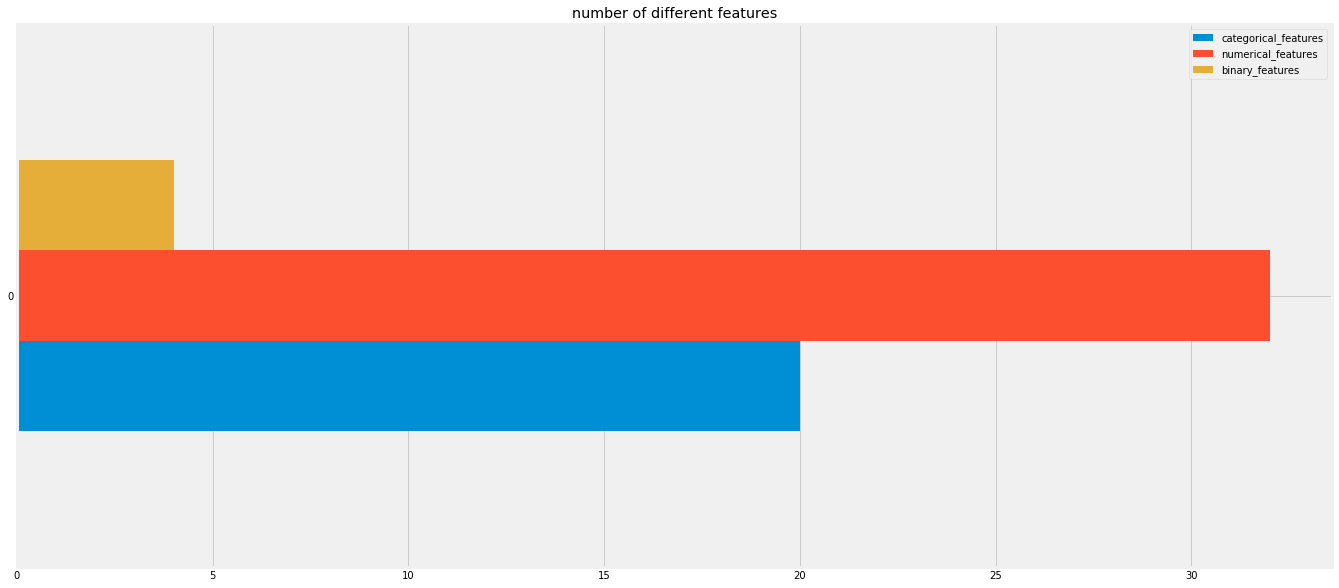

In [24]:
categories_list = []
categories_list.append(len(categorical_columns))
categories_list.append(len(numerical_columns))
categories_list.append(len(binary_columns))

categories_df = pd.DataFrame(categories_list, 
                             index=["categorical_features", "numerical_features", "binary_features"])

categories_df = categories_df.transpose().plot(kind="barh", figsize=(21, 10), title="number of different features")


In [25]:
if train_sample_fraction is not None:
    train_sample = train.sample(frac=15000, random_state=42)
elif train_sample_num is not None:
    train_sample = train.sample(15000, random_state=42)
else:
    train_sample = train.sample(n=15000, random_state=42)

gc.collect()

30

In [26]:
categorical_columns

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel']

In [27]:
#test_dtypes = {k: v for k, v in dtypes.items() if k in good_cols}



In [28]:
#test_dtypes


In [29]:
#cd ..

In [30]:
#pwd

In [31]:
#cd test

In [32]:
#test = pd.read_csv('test.csv', dtype=dtypes, usecols=good_cols[:-1],nrows=100000)

In [33]:
#test.head()

In [34]:
#new = train_sample["OsBuildLab"].str.split(".", expand = True)
#train_sample["OsBuildLab_1"] = new[2]

#new = test["OsBuildLab"].str.split(".", expand = True)
#test["OsBuildLab_1"] = new[2]


#categorical_columns.append("OsBuildLab_1")
#del new

In [35]:
train_sample = train_sample.drop(['MachineIdentifier'], axis=1)
#test = test.drop(['MachineIdentifier'], axis=1)

In [36]:
train_sample = train_sample.reset_index(drop=True)

In [37]:
train_sample

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,1.1.15100.1,4.18.1806.18062,1.273.165.0,53447.0,1.0,169,147157.0,27.0,209.0,74,...,NaN,0.0,142.0,69820.0,1,0.0,0,0.0,3.0,1
1,1.1.15100.1,4.18.1806.18062,1.273.334.0,53447.0,1.0,167,860.0,NaN,276.0,74,...,NaN,NaN,513.0,40396.0,0,NaN,0,1.0,11.0,0
2,1.1.15100.1,4.18.1807.18075,1.273.1405.0,7945.0,2.0,155,82373.0,18.0,201.0,-25,...,NaN,0.0,897.0,7221.0,0,0.0,0,0.0,10.0,0
3,1.1.15100.1,4.9.10586.1106,1.273.164.0,53742.0,2.0,43,10421.0,18.0,53.0,42,...,NaN,0.0,355.0,19970.0,1,0.0,0,0.0,7.0,0
4,1.1.15100.1,4.18.1807.18075,1.273.740.0,53447.0,1.0,207,111352.0,27.0,277.0,75,...,NaN,NaN,142.0,53010.0,0,NaN,0,1.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.1.14003.0,4.11.15063.447,1.249.608.0,62773.0,1.0,80,146255.0,27.0,101.0,107,...,NaN,NaN,168.0,36040.0,0,NaN,0,0.0,3.0,0
14996,1.1.15300.6,4.9.10586.0,1.277.25.0,53447.0,1.0,158,11597.0,27.0,202.0,70,...,0.0,0.0,554.0,33054.0,1,0.0,0,1.0,1.0,0
14997,1.1.15200.1,4.18.1807.18075,1.275.570.0,53447.0,1.0,66,113952.0,NaN,89.0,88,...,NaN,NaN,142.0,70492.0,1,NaN,0,0.0,5.0,1
14998,1.1.15100.1,4.18.1807.18075,1.273.1552.0,53447.0,1.0,43,75201.0,18.0,53.0,42,...,NaN,NaN,142.0,5612.0,0,NaN,0,1.0,7.0,1


In [38]:

modes = train_sample.mode()

for col in train_sample.columns:
    train_sample[col] = np.where(train_sample[col].isnull(), modes[col], train_sample[col])

del modes

In [39]:
#modes_test = test.mode()

#for col in test.columns:
    #test[col] = np.where(test[col].isnull(), modes_test[col], test[col])

#train_sample.shape
#del modes_test

In [40]:
train_sample

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,1.1.15100.1,4.18.1806.18062,1.273.165.0,53447.0,1.0,169,147157.0,27.0,209.0,74,...,0.0,0.0,142.0,69820.0,1,0.0,0,0.0,3.0,1
1,1.1.15100.1,4.18.1806.18062,1.273.334.0,53447.0,1.0,167,860.0,27.0,276.0,74,...,0.0,0.0,513.0,40396.0,0,0.0,0,1.0,11.0,0
2,1.1.15100.1,4.18.1807.18075,1.273.1405.0,7945.0,2.0,155,82373.0,18.0,201.0,-25,...,0.0,0.0,897.0,7221.0,0,0.0,0,0.0,10.0,0
3,1.1.15100.1,4.9.10586.1106,1.273.164.0,53742.0,2.0,43,10421.0,18.0,53.0,42,...,0.0,0.0,355.0,19970.0,1,0.0,0,0.0,7.0,0
4,1.1.15100.1,4.18.1807.18075,1.273.740.0,53447.0,1.0,207,111352.0,27.0,277.0,75,...,0.0,0.0,142.0,53010.0,0,0.0,0,1.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.1.14003.0,4.11.15063.447,1.249.608.0,62773.0,1.0,80,146255.0,27.0,101.0,107,...,0.0,0.0,168.0,36040.0,0,0.0,0,0.0,3.0,0
14996,1.1.15300.6,4.9.10586.0,1.277.25.0,53447.0,1.0,158,11597.0,27.0,202.0,70,...,0.0,0.0,554.0,33054.0,1,0.0,0,1.0,1.0,0
14997,1.1.15200.1,4.18.1807.18075,1.275.570.0,53447.0,1.0,66,113952.0,27.0,89.0,88,...,0.0,0.0,142.0,70492.0,1,0.0,0,0.0,5.0,1
14998,1.1.15100.1,4.18.1807.18075,1.273.1552.0,53447.0,1.0,43,75201.0,18.0,53.0,42,...,0.0,0.0,142.0,5612.0,0,0.0,0,1.0,7.0,1


In [41]:
#test.head()

In [42]:
tra=train_sample

In [43]:
true_numerical_columns = [
    'Census_ProcessorCoreCount',
    'Census_PrimaryDiskTotalCapacity',
    'Census_SystemVolumeTotalCapacity',
    'Census_TotalPhysicalRAM',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_InternalPrimaryDisplayResolutionHorizontal',
    'Census_InternalPrimaryDisplayResolutionVertical',
    'Census_InternalBatteryNumberOfCharges', 
    'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6'
    
]

# binary variables:
binary_variables = [c for c in tra.columns if (tra[c].nunique() == 2) & (c not in ['PuaMode'])]

# to finally make a census of the categorical variables:
categorical_columns = [c for c in tra.columns 
                       if c in ['PuaMode'] or (c not in true_numerical_columns) & (c not in binary_variables)]

variables = {
    'categorical_columns': len(categorical_columns),
    'binary_variables': len(binary_variables),
    'true_numerical_columns': len(true_numerical_columns)
}


In [44]:
true_numerical_columns

['Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Cat1',
 'Cat2',
 'Cat3',
 'Cat4',
 'Cat5',
 'Cat6']

In [45]:
binary_variables

['Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Wdft_IsGamer',
 'HasDetections']

In [46]:
categorical_columns

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_IsFlightingInternal',
 'Census_Firm

In [47]:
cardinality = []
for c in categorical_columns:
    if c == 'MachineIdentifier': continue
    cardinality.append([c, tra[c].nunique()])
cardinality.sort(key = lambda x:x[1], reverse=False)

In [48]:
cardinality

[['Census_IsFlightingInternal', 1],
 ['Census_IsWIMBootEnabled', 1],
 ['Census_ProcessorManufacturerIdentifier', 3],
 ['AVProductsInstalled', 4],
 ['Census_PrimaryDiskTypeName', 4],
 ['Census_GenuineStateName', 4],
 ['OsSuite', 5],
 ['Census_OSWUAutoUpdateOptionsName', 6],
 ['Census_ActivationChannel', 6],
 ['SkuEdition', 8],
 ['Census_PowerPlatformRoleName', 8],
 ['OsPlatformSubRelease', 9],
 ['SmartScreen', 9],
 ['Census_OSInstallTypeName', 9],
 ['Census_MDC2FormFactor', 11],
 ['Census_InternalBatteryType', 12],
 ['Census_OSBranch', 13],
 ['Wdft_RegionIdentifier', 15],
 ['Census_OSSkuName', 16],
 ['Census_OSEdition', 17],
 ['Census_OSBuildNumber', 21],
 ['Census_ChassisTypeName', 22],
 ['OsBuild', 24],
 ['OrganizationIdentifier', 25],
 ['EngineVersion', 34],
 ['Census_OSInstallLanguageIdentifier', 39],
 ['Census_OSUILocaleIdentifier', 47],
 ['AppVersion', 61],
 ['Census_FirmwareManufacturerIdentifier', 84],
 ['IeVerIdentifier', 89],
 ['LocaleEnglishNameIdentifier', 140],
 ['Census_OS

In [49]:
from tqdm import tqdm

In [50]:
def frequency_encoding(variable):

    t = tra[variable].value_counts().reset_index()
    t = t.reset_index()
    t.loc[t[variable] == 1, 'level_0'] = np.nan
    t.set_index('index', inplace=True)
    max_label = t['level_0'].max() + 1
    t.fillna(max_label, inplace=True)
    return t.to_dict()['level_0']


In [51]:
frequency_encoded_variables = [
    'Census_OEMModelIdentifier',
    'CityIdentifier',
    'Census_FirmwareVersionIdentifier',
#    'AvSigVersion',
    'Census_ProcessorModelIdentifier',
    'Census_OEMNameIdentifier',
    
]

In [52]:
for variable in tqdm(frequency_encoded_variables):
    freq_enc_dict = frequency_encoding(variable)
    tra[variable] = tra[variable].map(lambda x: freq_enc_dict.get(x, np.nan))

100%|██████████| 5/5 [00:00<00:00, 67.57it/s]


In [53]:
tra

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,1.1.15100.1,4.18.1806.18062,1.273.165.0,53447.0,1.0,169,608.0,27.0,209.0,74,...,0.0,0.0,142.0,369.0,1,0.0,0,0.0,3.0,1
1,1.1.15100.1,4.18.1806.18062,1.273.334.0,53447.0,1.0,167,78.0,27.0,276.0,74,...,0.0,0.0,513.0,760.0,0,0.0,0,1.0,11.0,0
2,1.1.15100.1,4.18.1807.18075,1.273.1405.0,7945.0,2.0,155,0.0,18.0,201.0,-25,...,0.0,0.0,897.0,53.0,0,0.0,0,0.0,10.0,0
3,1.1.15100.1,4.9.10586.1106,1.273.164.0,53742.0,2.0,43,775.0,18.0,53.0,42,...,0.0,0.0,355.0,5.0,1,0.0,0,0.0,7.0,0
4,1.1.15100.1,4.18.1807.18075,1.273.740.0,53447.0,1.0,207,403.0,27.0,277.0,75,...,0.0,0.0,142.0,217.0,0,0.0,0,1.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.1.14003.0,4.11.15063.447,1.249.608.0,62773.0,1.0,80,197.0,27.0,101.0,107,...,0.0,0.0,168.0,132.0,0,0.0,0,0.0,3.0,0
14996,1.1.15300.6,4.9.10586.0,1.277.25.0,53447.0,1.0,158,1576.0,27.0,202.0,70,...,0.0,0.0,554.0,2.0,1,0.0,0,1.0,1.0,0
14997,1.1.15200.1,4.18.1807.18075,1.275.570.0,53447.0,1.0,66,1576.0,27.0,89.0,88,...,0.0,0.0,142.0,725.0,1,0.0,0,0.0,5.0,1
14998,1.1.15100.1,4.18.1807.18075,1.273.1552.0,53447.0,1.0,43,329.0,18.0,53.0,42,...,0.0,0.0,142.0,1326.0,0,0.0,0,1.0,7.0,1


In [54]:
#test[variable] = test[variable].map(lambda x: freq_enc_dict.get(x, np.nan))

In [55]:
#test

In [56]:
indexer = {}
for col in tqdm(categorical_columns):
    if col == 'MachineIdentifier': continue
    _, indexer[col] = pd.factorize(tra[col])
    
for col in tqdm(categorical_columns):
    if col == 'MachineIdentifier': continue
    tra[col] = indexer[col].get_indexer(tra[col])
#    test[col] = indexer[col].get_indexer(test[col])
    

tra[:5]

100%|██████████| 43/43 [00:00<00:00, 683.31it/s]


,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,1,0,0,0.0,0,1
1,0,0,1,0,0,1,1,0,1,0,...,0,0.0,1,1,0,0,0,1.0,1,0
2,0,1,2,1,1,2,2,1,2,1,...,0,0.0,2,2,0,0,0,0.0,2,0
3,0,2,3,2,1,3,3,1,3,2,...,0,0.0,3,3,1,0,0,0.0,3,0
4,0,1,4,0,0,4,4,0,4,3,...,0,0.0,0,4,0,0,0,1.0,4,0


In [57]:
tra

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,1,0,0,0.0,0,1
1,0,0,1,0,0,1,1,0,1,0,...,0,0.0,1,1,0,0,0,1.0,1,0
2,0,1,2,1,1,2,2,1,2,1,...,0,0.0,2,2,0,0,0,0.0,2,0
3,0,2,3,2,1,3,3,1,3,2,...,0,0.0,3,3,1,0,0,0.0,3,0
4,0,1,4,0,0,4,4,0,4,3,...,0,0.0,0,4,0,0,0,1.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,19,13,1284,10,0,77,212,0,56,43,...,0,0.0,15,354,0,0,0,0.0,0,0
14996,3,11,16,0,0,39,17,0,30,26,...,0,0.0,5,369,1,0,0,1.0,5,0
14997,1,1,860,0,0,13,17,0,9,7,...,0,0.0,0,740,1,0,0,0.0,7,1
14998,0,1,526,0,0,3,1068,1,3,2,...,0,0.0,0,1610,0,0,0,1.0,3,1


In [58]:
tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 56 columns):
EngineVersion                                        15000 non-null int64
AppVersion                                           15000 non-null int64
AvSigVersion                                         15000 non-null int64
AVProductStatesIdentifier                            15000 non-null int64
AVProductsInstalled                                  15000 non-null int64
CountryIdentifier                                    15000 non-null int64
CityIdentifier                                       15000 non-null int64
OrganizationIdentifier                               15000 non-null int64
GeoNameIdentifier                                    15000 non-null int64
LocaleEnglishNameIdentifier                          15000 non-null int64
OsBuild                                              15000 non-null int64
OsSuite                                              15000 non-null int64
OsP

In [59]:
y = tra['HasDetections']
X = tra.drop(['HasDetections'], axis=1)

C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.0264907  0.02258843 0.03051219 0.01987515 0.02078233 0.02685894
 0.02797329 0.01887153 0.02440032 0.02548141 0.01105743 0.00601146
 0.01151444 0.01658123 0.00683955 0.01441887 0.03397328 0.01168257
 0.0255071  0.02814654 0.02059403 0.01094105 0.02861518 0.0239476
 0.01410343 0.02784745 0.02339117 0.01640367 0.02448238 0.01793913
 0.01581821 0.00956128 0.00882094 0.01555659 0.02514468 0.0132639
 0.01102347 0.02475613 0.01292152 0.01267007 0.02582074 0.02184956
 0.02314303 0.01931219 0.0095375  0.0184102  0.         0.00013734
 0.02555705 0.0293912  0.0115193  0.         0.00695437 0.01313694
 0.02786198]


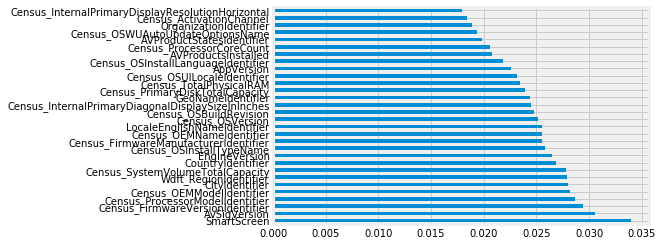

In [60]:
X = tra.iloc[:,0:55]
y = tra.iloc[:,-1]    
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [61]:
feat_importances.nlargest(20)

SmartScreen                                          0.033973
AvSigVersion                                         0.030512
Census_FirmwareVersionIdentifier                     0.029391
Census_ProcessorModelIdentifier                      0.028615
Census_OEMModelIdentifier                            0.028147
CityIdentifier                                       0.027973
Wdft_RegionIdentifier                                0.027862
Census_SystemVolumeTotalCapacity                     0.027847
CountryIdentifier                                    0.026859
EngineVersion                                        0.026491
Census_OSInstallTypeName                             0.025821
Census_FirmwareManufacturerIdentifier                0.025557
Census_OEMNameIdentifier                             0.025507
LocaleEnglishNameIdentifier                          0.025481
Census_OSVersion                                     0.025145
Census_OSBuildRevision                               0.024756
Census_I

In [62]:
R=['SmartScreen','AvSigVersion','Census_FirmwareVersionIdentifier','Census_ProcessorModelIdentifier','Census_SystemVolumeTotalCapacity','Census_OEMModelIdentifier','EngineVersion','CityIdentifier','GeoNameIdentifier','CountryIdentifier','Wdft_RegionIdentifier','Census_OEMNameIdentifier','Census_OSVersion','Census_OSInstallTypeName','Census_TotalPhysicalRAM','Census_FirmwareManufacturerIdentifier','Census_OSBuildRevision','Census_PrimaryDiskTotalCapacity','Census_InternalPrimaryDiagonalDisplaySizeInInches','LocaleEnglishNameIdentifier']

In [63]:
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
X = tra.iloc[:,0:55]
y = tra.iloc[:,-1]  
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)


Explained Variance: [9.99999915e-01 7.72483193e-08 8.09935061e-09]
[[-9.22810717e-11 -1.63962293e-10 -1.24694545e-08 -9.51875399e-10
  -1.94184636e-11 -8.69276440e-10  1.95896390e-09  2.28515069e-12
  -3.35954370e-10 -8.42434512e-11 -1.90199943e-10  7.62507990e-11
  -1.93259890e-10 -1.31236550e-09  7.50999221e-11 -5.26425403e-10
   4.88151222e-12  4.41642109e-10  1.46493595e-09 -2.84473922e-08
   1.32223418e-10  1.33148983e-11  2.31913413e-08  8.38324956e-06
   8.69769645e-11 -1.28914824e-07  4.89385392e-07  4.98955860e-10
   1.64476419e-09  3.40207923e-08  2.75115080e-08  4.27057608e-10
   3.09206752e-11  1.00000000e+00 -1.74335671e-09 -2.40334724e-10
  -1.53125406e-10 -1.63144409e-09  1.94115535e-10  1.91587679e-10
  -4.34824613e-11  2.00047034e-10  1.82103070e-10  2.74093898e-11
   1.88744903e-11  9.43871460e-11 -0.00000000e+00 -6.22930748e-14
  -1.94298257e-10  1.23552894e-08 -8.19870965e-11 -0.00000000e+00
  -2.62106329e-11  2.49352071e-11  4.15445459e-11]
 [ 4.68775512e-08 -1.931

In [64]:
R=['AvSigVersion','CityIdentifier','SmartScreen','Census_OEMModelIdentifier','Census_ProcessorModelIdentifier',
   'CountryIdentifier','Census_SystemVolumeTotalCapacity','Census_OEMNameIdentifier',
   'GeoNameIdentifier','LocaleEnglishNameIdentifier',
  'Census_InternalPrimaryDiagonalDisplaySizeInInches','Census_TotalPhysicalRAM','Census_OSBuildRevision','Census_OSVersion',
  'Census_PrimaryDiskTotalCapacity','EngineVersion','AppVersion','Census_ProcessorCoreCount','AVProductStatesIdentifier','AVProductsInstalled']

In [65]:
X=tra[R]

In [66]:
X.head(4)

,AvSigVersion,CityIdentifier,SmartScreen,Census_OEMModelIdentifier,Census_ProcessorModelIdentifier,CountryIdentifier,Census_SystemVolumeTotalCapacity,Census_OEMNameIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_TotalPhysicalRAM,Census_OSBuildRevision,Census_OSVersion,Census_PrimaryDiskTotalCapacity,EngineVersion,AppVersion,Census_ProcessorCoreCount,AVProductStatesIdentifier,AVProductsInstalled
0,0,0,0,0,0,0,476164.0,0,0,0,23.5,4096.0,0,0,476940.0,0,0,2.0,0,0
1,1,1,0,1,1,1,28920.0,1,1,0,12.5,2048.0,1,1,29600.0,0,0,4.0,0,0
2,2,2,0,2,2,2,704559.0,2,2,1,14.0,4096.0,2,2,715404.0,0,1,4.0,1,1
3,3,3,0,3,3,3,102613.0,3,3,2,15.5,4096.0,3,3,953869.0,0,2,4.0,2,1


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
from sklearn.model_selection import cross_val_score

# create a 70/30 split of the data 
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.3)

In [177]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=100, max_features=0.5, n_jobs=-1, oob_score=False)
m.fit(xtrain, ytrain)
scores=cross_val_score(m, X, y, cv=10)
y_pred = m.predict(xtest)

In [178]:
scores

array([0.62225183, 0.63466667, 0.62533333, 0.59733333, 0.644     ,
       0.62266667, 0.608     , 0.62      , 0.61266667, 0.61507672])

In [179]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [200]:
cm = confusion_matrix(ytest, m.predict(xtest))
print('Confusuion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))


auc = roc_auc_score(ytest, y_pred)
print('ROC AUC: %f' % auc)




Confusuion Matrix:
[[1430  809]
 [ 859 1402]]
Accuracy: 0.5246666666666666
ROC AUC: 0.524561


In [201]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51      2239
           1       0.53      0.55      0.54      2261

    accuracy                           0.52      4500
   macro avg       0.52      0.52      0.52      4500
weighted avg       0.52      0.52      0.52      4500



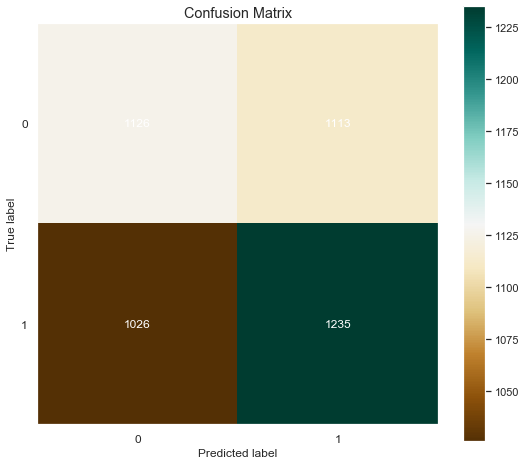

In [202]:
#Plotting of confusion Matrix
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(ytest,y_pred, cmap="BrBG")

In [203]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [204]:
model = model.fit(xtrain,ytrain)
scores1=cross_val_score(model, X, y, cv=10)
y_pred = model.predict(xtest)


In [205]:
scores1

array([0.51499001, 0.51      , 0.51466667, 0.51866667, 0.53266667,
       0.50266667, 0.53333333, 0.52466667, 0.50933333, 0.53368913])

In [188]:
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int8)

In [206]:
cm = confusion_matrix(ytest, m.predict(xtest))
print('Confusuion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

auc = roc_auc_score(ytest, y_pred)
print('ROC AUC: %f' % auc)

Confusuion Matrix:
[[1430  809]
 [ 859 1402]]
Accuracy: 0.5246666666666666
ROC AUC: 0.524561


In [207]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51      2239
           1       0.53      0.55      0.54      2261

    accuracy                           0.52      4500
   macro avg       0.52      0.52      0.52      4500
weighted avg       0.52      0.52      0.52      4500



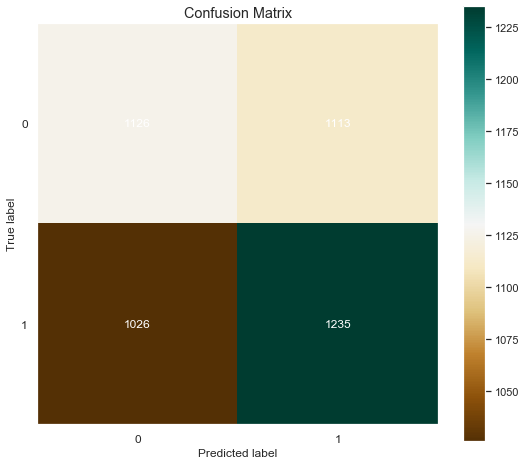

In [208]:
#Plotting of confusion Matrix
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(ytest,y_pred, cmap="BrBG")

In [198]:
from sklearn.linear_model import LogisticRegression

In [199]:
logistic_regression= LogisticRegression(solver='lbfgs', multi_class='ovr')
model=logistic_regression.fit(xtrain,ytrain)
scores2=cross_val_score(model, X, y, cv=10)

C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

In [83]:
y_pred=logistic_regression.predict(xtest)

In [144]:
scores2

array([0.54230513, 0.556     , 0.55      , 0.52      , 0.56266667,
       0.56066667, 0.53466667, 0.572     , 0.54666667, 0.56571047])

In [145]:
cm = confusion_matrix(ytest, m.predict(xtest))
print('Confusuion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
auc = roc_auc_score(ytest, y_pred)
print('ROC AUC: %f' % auc)


Confusuion Matrix:
[[1403  836]
 [ 834 1427]]
Accuracy: 0.5246666666666666
ROC AUC: 0.524561


In [86]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53      2239
           1       0.55      0.61      0.58      2261

    accuracy                           0.56      4500
   macro avg       0.56      0.56      0.56      4500
weighted avg       0.56      0.56      0.56      4500



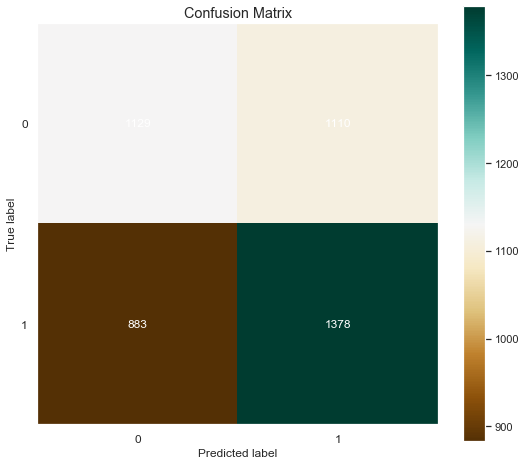

In [87]:
#Plotting of confusion Matrix
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(ytest,y_pred, cmap="BrBG")

In [209]:
from sklearn.dummy import DummyClassifier

In [210]:
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit( X,y )


DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [211]:
scores3=cross_val_score(model, X, y, cv=10)
y_pred = model.predict(xtest)


In [212]:
cm = confusion_matrix(ytest, m.predict(xtest))
print('Confusuion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

auc = roc_auc_score(ytest, y_pred)
print('ROC AUC: %f' % auc)

Confusuion Matrix:
[[1430  809]
 [ 859 1402]]
Accuracy: 0.5246666666666666
ROC AUC: 0.524561


In [213]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51      2239
           1       0.53      0.55      0.54      2261

    accuracy                           0.52      4500
   macro avg       0.52      0.52      0.52      4500
weighted avg       0.52      0.52      0.52      4500



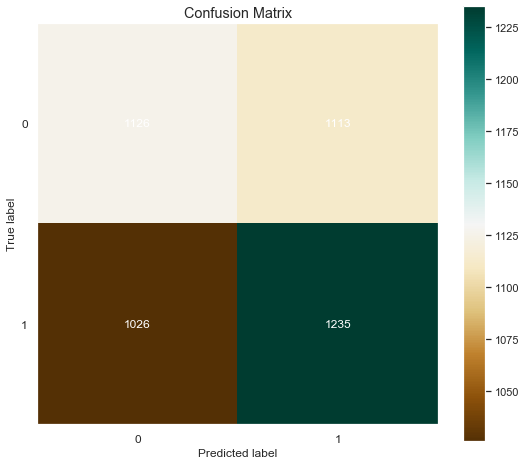

In [214]:
#Plotting of confusion Matrix
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(ytest,y_pred, cmap="BrBG")

In [215]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(learning_rate=0.03, 
                            n_estimators=3000, 
                            max_depth=11,
                            min_child_weight=9,
                            gamma=0.2,
                            subsample=1,
                            colsample_bytree=0.4,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.6,
                            reg_lambda = 3,
                            seed=42)

clf_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xtest, ytest)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)

y_pred = clf_xgb.predict(xtest)

[0]	validation_0-auc:0.682485	validation_1-auc:0.625045
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.881538	validation_1-auc:0.686323
Stopping. Best iteration:
[83]	validation_0-auc:0.870342	validation_1-auc:0.686913



In [216]:
cm = confusion_matrix(ytest, m.predict(xtest))
print('Confusuion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

auc = roc_auc_score(ytest, y_pred)
print('ROC AUC: %f' % auc)

Confusuion Matrix:
[[1430  809]
 [ 859 1402]]
Accuracy: 0.6293333333333333
ROC AUC: 0.629257


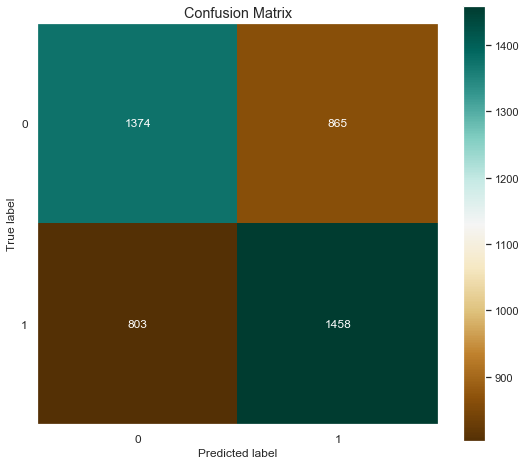

In [217]:
#Plotting of confusion Matrix
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(ytest,y_pred, cmap="BrBG")

In [147]:
from sklearn.naive_bayes import GaussianNB

In [152]:
model = GaussianNB()
model = model.fit(xtrain,ytrain)
scores=cross_val_score(model, X, y, cv=10)
y_pred = model.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
auc = roc_auc_score(ytest, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.546
ROC AUC: 0.544826


In [153]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.40      2239
           1       0.53      0.79      0.63      2261

    accuracy                           0.55      4500
   macro avg       0.56      0.54      0.52      4500
weighted avg       0.56      0.55      0.52      4500



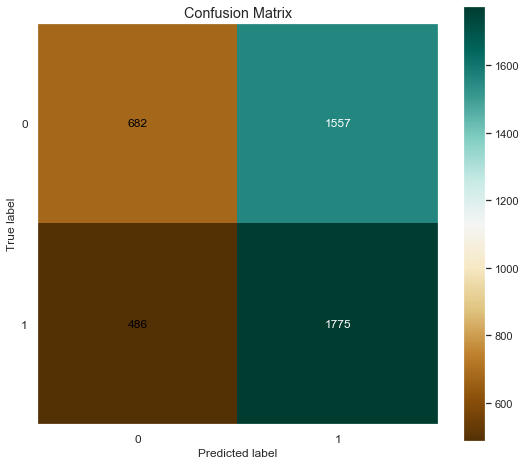

In [154]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(ytest,y_pred, cmap="BrBG")

In [100]:
from sklearn import tree


In [155]:
clf = tree.DecisionTreeClassifier(random_state=0)


In [158]:
clf = clf.fit(xtrain,ytrain)
scores4=cross_val_score(clf, X, y, cv=10)
y_pred = clf.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
auc = roc_auc_score(ytest, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.5468888888888889
ROC AUC: 0.546916


In [159]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55      2239
           1       0.55      0.54      0.55      2261

    accuracy                           0.55      4500
   macro avg       0.55      0.55      0.55      4500
weighted avg       0.55      0.55      0.55      4500



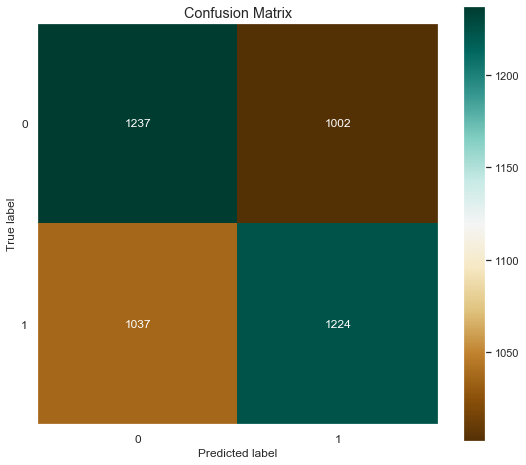

In [104]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(ytest,y_pred, cmap="BrBG")

In [105]:
scores4

array([0.53897402, 0.56733333, 0.556     , 0.554     , 0.546     ,
       0.548     , 0.53333333, 0.54533333, 0.538     , 0.55436958])

In [106]:

df=pd.DataFrame(data=scores2,columns=['Logistic'])
df['DecisionTree']=scores4
df['KNN']=scores1
df['RandomForest']=scores
df
from scipy.stats import ttest_rel
from scipy.stats import friedmanchisquare
def ptest(p):
  if p > 0.05:
    print('Probably the same distribution')
  else:
    print('Probably different distributions')

stat, p = ttest_rel(scores,scores1)
#stat, p = friedmanchisquare(RandomForest,KNN)
print('stat=%.3f, p=%.3f' % (stat, p))
ptest(p)
#stat, p = friedmanchisquare(Logistic,DecisionTree)
stat, p = ttest_rel(scores2,scores4)
print('stat=%.3f, p=%.3f' % (stat, p))
ptest(p)


stat=0.559, p=0.590
Probably the same distribution
stat=0.546, p=0.598
Probably the same distribution


In [218]:
from sklearn.ensemble import BaggingClassifier

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(),
                       n_estimators=10, random_state=0).fit(X, y)

C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

In [221]:
scores_bag=cross_val_score(clf, X, y, cv=10)
y_pred = clf.predict(xtest)

C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ARUN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

In [222]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
auc = roc_auc_score(ytest, y_pred)
print('ROC AUC: %f' % auc)
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

Accuracy: 0.9815555555555555
ROC AUC: 0.981567
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2239
           1       0.98      0.98      0.98      2261

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



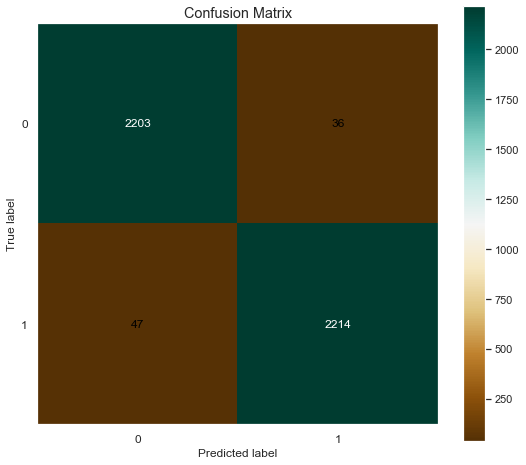

In [223]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(ytest,y_pred, cmap="BrBG")

In [224]:
from sklearn.model_selection import cross_val_score

In [225]:
from sklearn.ensemble import AdaBoostClassifier

In [226]:
clf = AdaBoostClassifier(n_estimators=100)

In [227]:
 scores = cross_val_score(clf, X, y, cv=5)

In [228]:
clf=clf.fit(xtrain,ytrain)

In [229]:
y_pred = clf.predict(xtest)

In [172]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.6251111111111111


In [173]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
auc = roc_auc_score(ytest, y_pred)
print('ROC AUC: %f' % auc)
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

Accuracy: 0.6251111111111111
ROC AUC: 0.625038
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      2239
           1       0.62      0.64      0.63      2261

    accuracy                           0.63      4500
   macro avg       0.63      0.63      0.62      4500
weighted avg       0.63      0.63      0.63      4500



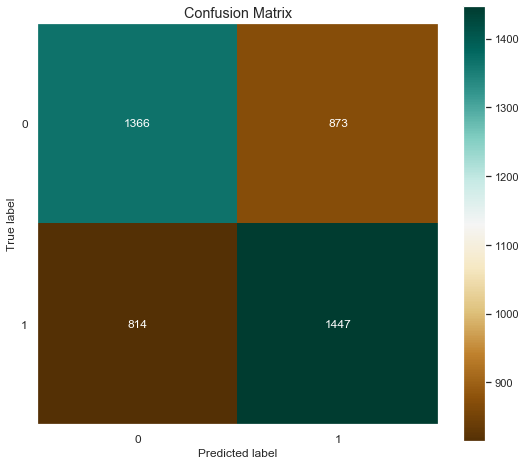

In [230]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(ytest,y_pred, cmap="BrBG")